In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys

In [3]:
data = pd.concat(map(pd.read_csv, ['A1.csv', 'E1.csv','I1.csv','O1.csv','U1.csv']))

In [4]:
data.to_excel('pandas_to_excel.xlsx', sheet_name='new_sheet_name')

In [5]:
df = pd.read_csv("pandas_to_excel.csv", sep = '\t')

In [6]:
n_cluster = 5 

max_iterations = 100

centroid = []

cluster_group = []

distances = []

new_centroid = []


In [7]:
X = df.iloc[:,:].values

Initializing Random Centroids

In [8]:
random_index = random.sample(range(0,X.shape[0]),n_cluster)
centroid = X[random_index]

Function to find min distance to the assigned centroids

In [9]:
def assign_clusters(X):
    
    cluster_group = []
    distances = []
       
    for row in X:
        for centroids in centroid:
            distances.append(np.sqrt(np.dot(row-centroids,row-centroids)))
        min_distance = min(distances)
        index_pos = distances.index(min_distance)
        cluster_group.append(index_pos)
        distances.clear()
    return np.array(cluster_group)

Function to find move the centroid  //taking avg of the data ie F1 and F2

In [10]:
def move_centroids(X,cluster_group):
    new_centroids = []
    
    cluster_type = np.unique(cluster_group)
    
    for type in cluster_type:
        new_centroids.append(X[cluster_group == type].mean(axis = 0))
        
    return np.array(new_centroids)    

In [11]:
def predict(X):
    
    random_index = random.sample(range(0,X.shape[0]),n_cluster)
    centroid = X[random_index]
    
    for i in range(max_iterations):
        cluster_group = assign_clusters(X)
        old_centroid = centroid
        centroid = move_centroids(X,cluster_group)
    
        if (old_centroid == centroid).all():
        
           break
        
    return cluster_group    

In [12]:
Y = predict(X)

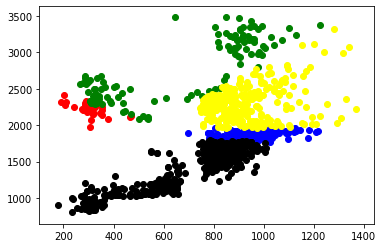

In [13]:
plt.scatter(X[Y == 0,0],X[Y == 0,1],color='red')
plt.scatter(X[Y == 1,0],X[Y == 1,1],color='blue')
plt.scatter(X[Y == 2,0],X[Y == 2,1],color='green')
plt.scatter(X[Y == 3,0],X[Y == 3,1],color='yellow')
plt.scatter(X[Y == 4,0],X[Y == 4,1],color='black')

plt.show()